In [40]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

%matplotlib inline

In [41]:
df = pd.read_csv('/Users/braulio/Documents/data/train.csv', index_col=0)
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Where are the NaN values?:

In [42]:
df.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

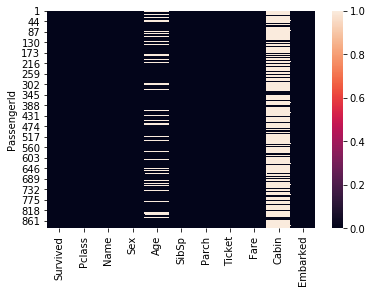

In [43]:
sns.heatmap(df.isna())

### Fix missing values on dataset

* easy: impute missing values in the age column
* medium: apply one-hot encoding
* hard: bin the age column

### Missing age values

#### Exploring age avgs by sub-categories:

In [44]:
df['Age'].mean()

29.69911764705882

In [45]:
df['Age'].median()

28.0

In [46]:
df[df["Pclass"]==1]["Age"].mean()

38.233440860215055

In [47]:
df[df["Pclass"]==2]["Age"].mean()

29.87763005780347

In [48]:
df[df["Pclass"]==3]["Age"].mean()

25.14061971830986

In [49]:
df[df["Sex"]=='male']["Age"].mean()

30.72664459161148

In [50]:
df[df["Sex"]=='female']["Age"].mean()

27.915708812260537

#### Imputation

In [51]:
df.groupby('Pclass').transform('mean')['Age']

PassengerId
1      25.140620
2      38.233441
3      25.140620
4      38.233441
5      25.140620
         ...    
887    29.877630
888    38.233441
889    25.140620
890    38.233441
891    25.140620
Name: Age, Length: 891, dtype: float64

In [52]:
df['Age'].fillna(df.groupby('Pclass').transform('mean')['Age'], inplace=True)

In [53]:
df.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

### Missing Embarked values

In [54]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [55]:
df['Embarked'] = df['Embarked'].fillna('S')
df.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      0
dtype: int64

### Missing Cabin values

In [56]:
df['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

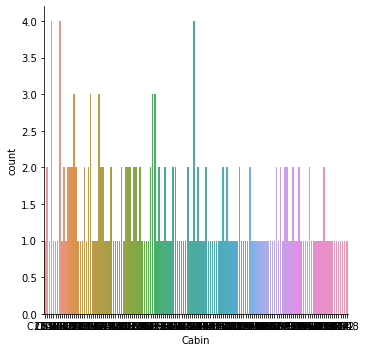

In [57]:
sns.catplot(x = 'Cabin', kind = 'count', data = df)

In [58]:
df['Cabin'] = df['Cabin'].fillna('missing')

In [59]:
df['Cabin'] = df['Cabin'].str[0]

In [60]:
df['Cabin'].unique()

array(['m', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [61]:
df['Cabin'].value_counts()

m    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: Cabin, dtype: int64

In [62]:
df.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
dtype: int64

### Drop unwanted columns

In [63]:
df_1 = df.drop(['Name', 'Ticket'], axis = 1)
df_1.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
PassengerId,,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,m,S
2,1,1,female,38.0,1,0,71.2833,C,C
3,1,3,female,26.0,0,0,7.9250,m,S
4,1,1,female,35.0,1,0,53.1000,C,S
5,0,3,male,35.0,0,0,8.0500,m,S


### Sex, and other string categories into binary

In [30]:
dummies = pd.get_dummies(df_1, drop_first = True)
dummies.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_M,Cabin_T,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,,,,,,,,
1,0,3,22.0,1,0,7.2500,1,0,0,0,0,0,0,1,0,0,1
2,1,1,38.0,1,0,71.2833,0,0,1,0,0,0,0,0,0,0,0
3,1,3,26.0,0,0,7.9250,0,0,0,0,0,0,0,1,0,0,1
4,1,1,35.0,1,0,53.1000,0,0,1,0,0,0,0,0,0,0,1
5,0,3,35.0,0,0,8.0500,1,0,0,0,0,0,0,1,0,0,1
